Solve problem on Page 740 of the book but make it binary instead.
## **Location Problem**
Let us consider the case of LaRosa Machine Shop (LMS). LMS is studying where to locate 
its tool bin facility on the shop floor. The locations of the five production stations appear in 
Figure 14.9. In an attempt to be fair to the workers in each of the production stations, management has decided to try to find the position of the tool bin that would minimize the sum 
of the distances from the tool bin to the five production stations. We define the following 
decision variables:

X = horizontal location of the tool bin

Y = vertical location of the tool bin

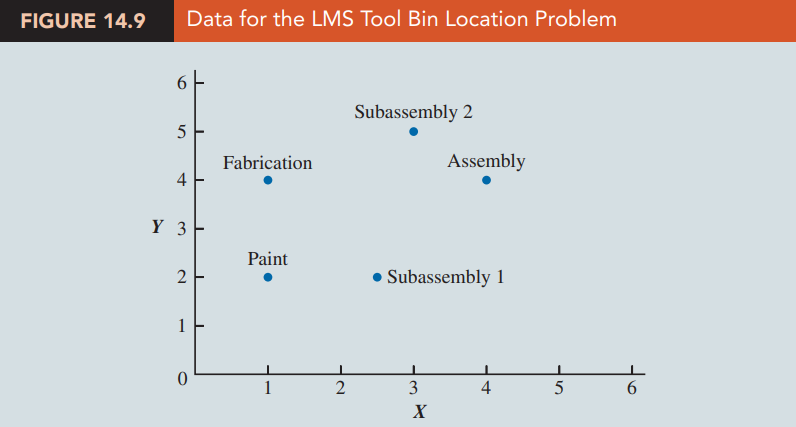

<table>
  <tr>
    <th>Station</th>
    <th>Location X</th>
    <th>Location Y</th>
  </tr>
  <tr>
    <td>Fabrication</td>
    <td>1</td>
    <td>4</td>
  </tr>
  <tr>
    <td>Paint</td>
    <td>1</td>
    <td>2</td>
  </tr>
  <tr>
    <td>Subassembly 1</td>
    <td>2.5</td>
    <td>2</td>
  </tr>
  <tr>
    <td>Subassembly 2</td>
    <td>3</td>
    <td>5</td>
  </tr>
  <tr>
    <td>Assembly</td>
    <td>4</td>
    <td>4</td>
  </tr>
</table>

## **Solution 1**
**Use calculus**
I had to brush up my calc skills a bit Here are some good resources for that:

https://www.youtube.com/watch?v=Hg38kfK5w4E

https://calcworkshop.com/partial-derivatives/extrema-multivariable-functions/

https://math.libretexts.org/Bookshelves/Calculus/Vector_Calculus_(Corral)/02%3A_Functions_of_Several_Variables/2.05%3A_Maxima_and_Minima

In [1]:
data = [(1, 4), (1, 2), (2.5, 2), (3, 5), (4, 4)]

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y, data):
    x = np.atleast_2d(x)
    y = np.atleast_2d(y)
    sum_dist = np.zeros(x.shape)
    for x_i, y_i in data:
        sum_dist += np.sqrt((x - x_i)**2 + (y - y_i)**2)
    return sum_dist

In [3]:
# def not GPT written or anything, i can do second year data engineering (:
def plot3d(x, y):
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y, data)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(X, Y, Z, cmap='viridis')
    fig.colorbar(surf)
    ax.set_xlabel('X coordinate')
    ax.set_ylabel('Y coordinate')
    ax.set_zlabel('Z value')
    plt.title('3D Surface Plot')
    plt.show()


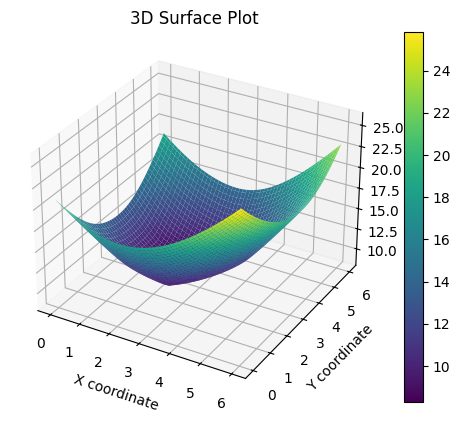

In [4]:
x = np.linspace(0, 6, 100)
y = np.linspace(0, 6, 100)
plot3d(x, y)

So this is what our function looks like, we can see that a minimum does exist within our bounds $x \in [0, 6], y \in [0, 6]$

now lets do some calc

\begin{align*}
f(x, y) = \sum_{(x_i, y_i) \in \mathcal{S}} \sqrt{(x - x_i)^2 + (y - y_i)^2}\\
\frac{\partial f}{\partial x} = \sum_{(x_i, y_i) \in \mathcal{S}} \frac{2(x - x_i)} {2 \sqrt{(x - x_i)^2 + (y - y_i)^2}}\\
\frac{\partial f}{\partial y} = \sum_{(x_i, y_i) \in \mathcal{S}} \frac{2(y - y_i)} {2 \sqrt{(x - x_i)^2 + (y - y_i)^2}}\\
\end{align*}

So now we have a very funny system of equations, we use numerical methods to solve in python.

In [5]:
import numpy as np
from scipy.optimize import fsolve

def equations(p):
    x, y = p
    sum_x = sum((x - xi) / np.sqrt((x - xi)**2 + (y - yi)**2) for xi, yi in data)
    sum_y = sum((y - yi) / np.sqrt((x - xi)**2 + (y - yi)**2) for xi, yi in data)
    return (sum_x, sum_y)

initial_guess = (0, 0)

solution = fsolve(equations, initial_guess)

print("Solution for (x, y):", solution)

Solution for (x, y): [2.22989218 3.34881129]


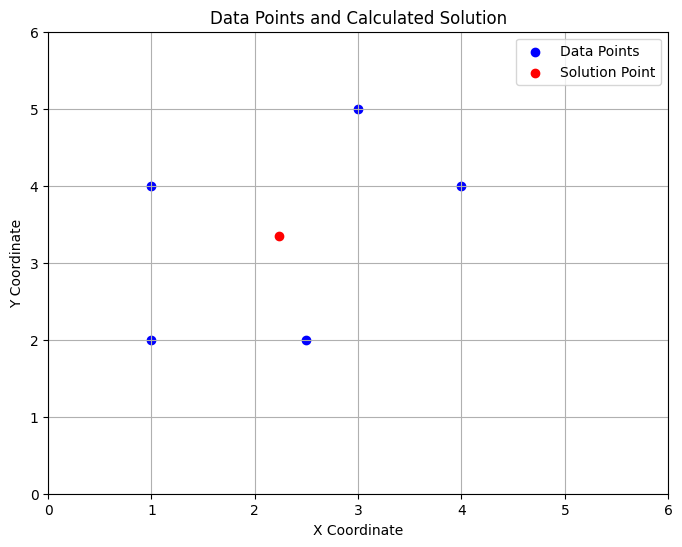

In [6]:
plt.figure(figsize=(8, 6))
plt.scatter(*zip(*data), color='blue', label='Data Points')
plt.scatter(*solution, color='red', label='Solution Point', zorder=5)
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Data Points and Calculated Solution')
plt.legend()
plt.grid(True)
plt.xlim(0, 6)
plt.ylim(0, 6)
plt.show()

Ofcourse if I were to fully work through this i would need to check the boundary points of our range, but we can see from the first plot that the min isnt there so am not going to do it.

## **Solution 2**
Solve this a binary Linear programming problem.
## **Idea**
Turn this space into a 6 x 6 grid of squares, then precompute the distance between the center of each square to each of the 5 locations, then just use a 6 x 6 binary var grid to pick which ever location minimizes the sum of distances.

## **Sets**

$\mathcal{X}$: Set of x coordinates.

$\mathcal{Y}$: Set of y coordinates.

$\mathcal{P}$: Set of Stations.

$\mathcal{C} = \{(x, y), x \in \mathcal{X}, y \in \mathcal{Y}\}$: Coordinates for each point we want to test.


## **Indecies**
$p \in \mathcal{P}$: Element in $\mathcal{P}$.

$(x, y) \in \mathcal{C}$: Coordinates in $\mathcal{C}$

## **Data**
$s_p,p \in \mathcal{P}$: Coordinates for each station $p$.

$d_{xyp}, (x, y) \in \mathcal{C}, p \in \mathcal{P}$, Distance from each point $(x, y)$ to each station $p$.

## **Decision Variables**

$z_{xy}, (x, y) \in \mathcal{C}$: Binary var representing whether to use location $(x, y)$.

## **Formulation**

**Objective Function**
\begin{align*}
\mathrm{Min} \sum_{(x, y) \in \mathcal{C}} z_{xy} (\sum_{p \in \mathcal{P}} d_{xyp})
\end{align*}

**S.T.**

\begin{gather}
\sum_{(x, y) \in \mathcal{C}} z_{xy} = 1\\
z_{xy} \in \{0, 1\}, \forall (x, y) \in \mathcal{C}
\end{gather}



In [7]:
from docplex.mp.model import Model
model = Model(name = "Location Problem")

In [8]:
import math
def dist(p1, p2):
    x1, y1 = p1
    x2, y2 = p2
    return math.sqrt((x1 - x2)**2 + (y1 - y2)**2)

In [9]:
## Data
data = [(1, 4), (1, 2), (2.5, 2), (3, 5), (4, 4)]
X = list(range(6))
Y = list(range(6))
P = list(range(5))

C = [(x, y) for x in X for y in Y]
d = {(x, y, p) : dist((x, y), data[p]) for x in X for y in Y for p in P}


In [10]:
def plotpoints(points):
    x, y = zip(*points)
    # Create a scatter plot
    plt.figure(figsize=(6, 4))
    plt.scatter(x, y, color='blue')  # Scatter plot: x vs y
    plt.title('Scatter Plot of Points')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.grid(True)  # Optional: adds a grid
    plt.axis('equal')  # Optional: ensures the scale of x and y axes are equal
    plt.show()

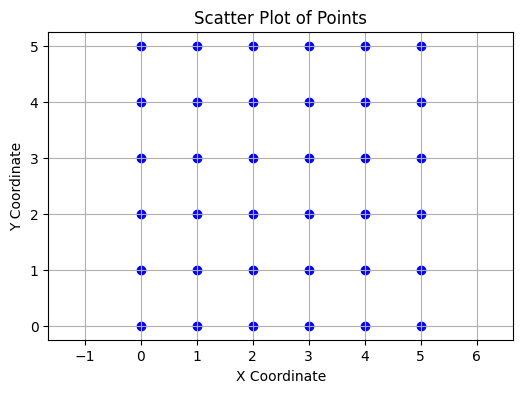

In [11]:
plotpoints(C)

In [12]:
z = model.binary_var_dict(C, name = "z")

In [13]:
model.minimize(model.sum(z[x, y] * model.sum(d[x, y, p] for p in P) for x, y in C))

In [14]:
model.add_constraint(model.sum(z[x, y] for x in X for y in Y) == 1)


docplex.mp.LinearConstraint[](z_0_0+z_0_1+z_0_2+z_0_3+z_0_4+z_0_5+z_1_0+z_1_1+z_1_2+z_1_3+z_1_4+z_1_5+z_2_0+z_2_1+z_2_2+z_2_3+z_2_4+z_2_5+z_3_0+z_3_1+z_3_2+z_3_3+z_3_4+z_3_5+z_4_0+z_4_1+z_4_2+z_4_3+z_4_4+z_4_5+z_5_0+z_5_1+z_5_2+z_5_3+z_5_4+z_5_5,EQ,1)

In [15]:
model.export_as_lp("location.lp")

'location.lp'

In [16]:
model.solve(log_output = True)

Version identifier: 22.1.1.0 | 2022-11-27 | 9160aff4d
CPXPARAM_Read_DataCheck                          1
Found incumbent of value 21.048542 after 0.00 sec. (0.00 ticks)
Found incumbent of value 8.418597 after 0.00 sec. (0.00 ticks)
Tried aggregator 1 time.
MIP Presolve eliminated 1 rows and 36 columns.
All rows and columns eliminated.
Presolve time = 0.00 sec. (0.01 ticks)

Root node processing (before b&c):
  Real time             =    0.00 sec. (0.02 ticks)
Parallel b&c, 16 threads:
  Real time             =    0.00 sec. (0.00 ticks)
  Sync time (average)   =    0.00 sec.
  Wait time (average)   =    0.00 sec.
                          ------------
Total (root+branch&cut) =    0.00 sec. (0.02 ticks)


docplex.mp.solution.SolveSolution(obj=8.4186,values={z_2_3:1})

In [17]:
obj = model.objective_value
assigment = [(x, y) for x in X for y in Y if z[x, y].solution_value == 1]
print(obj)
print(assigment)
# yayyyyy this is what we expected from the calc solve

8.418597068495664
[(2, 3)]
